# Calorie Analysis
## Questions

- How many average calories am I burning each day?
- Stacked bar chart: resting vs active calories each day = total each day
- What is the total number of calories I'm burning each week?
- Weekly Avg Active + Weekly Avg Resting = Weekly AVg Total e.g 1090 Weekly Avg Active + 21-6 Weekly Avg Resting = 3196 Weekly Avg Total
- Error handling for Activity Type where Day is out of order - maybe a switch statement to reorder the graph if the data is missing a particular day?

In [3]:
# An analysis on calories burnt by activity type - 
import pandas as pd
import matplotlib.pyplot as plt

# What week is it?
week = "Week 46"

# Try to import the CSV file, handling potential errors
try:
    # Import in CSV file and skip the first row
    calories = pd.read_csv('Week 46/Calories.csv')
    new_column_names = ['Date', 'Active Calories', 'Resting Calories', 'Total']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(calories.columns):
        calories.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Set 'Date' as the index so that xticks become the 'Date' rather than the 0, 1, 2 etc index.
    calories.set_index('Date', inplace=True)

    #print(calories)
except FileNotFoundError:
     print("The specified file was not found.")


# Some Math

In [4]:
# On average, how many calories am I burning each day?
average_daily_calories = round(calories['Total'].mean(), 1)

# How many average ACTIVE calories am I burning each day?git
average_active_calories = int(round(calories['Active Calories'].mean(), 0))

# How many average RESTING calories am I burning each day?
average_resting_calories = int(round(calories['Resting Calories'].mean(), 0))

# What is the total number of calories I'm burning each week?
total_calories_burnt = round(calories['Total'].sum(), 1)

Description = f'You burnt a total of {total_calories_burnt} calories this week. On average, that is about {int(average_daily_calories)} per day. \n\nTypically, {average_active_calories} of those calories were actively burnt and {average_resting_calories} were burnt resting.'

# Some Plotting

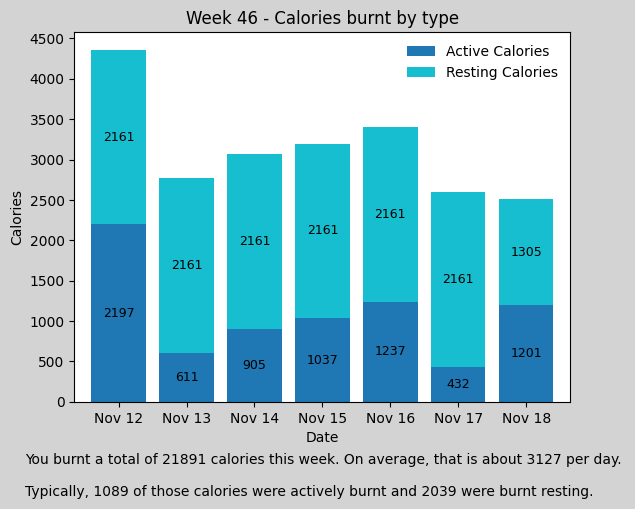

: 

In [5]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# Rename the dataframe for easy usage
df = calories

# Ignore 'Total' calories for the sake of the graph
df_without_total = df.drop('Total', axis=1) # axis=1 specifies that you want to drop a column, not a row.

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = df_without_total.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)

# Add the value of calories to each bar:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            size=9)

# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('lightgrey')

# Set the color of the graph itself
ax.set_facecolor('white')

# Edit the legend
ax.legend(loc='upper right', frameon=False)#, ncol=3)

# Label axis'
plt.xlabel('Date', color='black')
plt.ylabel('Calories', color='black')
plt.title(week + ' - Calories burnt by type', color='black')

# Customize x, y ticks
plt.xticks(rotation=0, color='black')

# Customize y-axis to display every 500 calories
max_calories = df_without_total.sum(axis=1).max()  # Find the maximum sum of calories
ytick_values = range(0, int(max_calories) + 500, 500)  # Create a range of values from 0 to max, stepping by 500
plt.yticks(ytick_values, color='black')

ax.annotate(Description,
            xy = (-0.1, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)

# Show me the dam thing
plt.show()